In [52]:
import sympy as sb
import matplotlib.pyplot as plt
import numpy as np
sb.init_printing()
%matplotlib inline

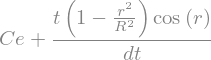

In [33]:
t,r=sb.symbols("t,r")
dt=sb.symbols("dt")
Ce,R=sb.symbols("Ce,R")
D_eff,k=sb.symbols("D_eff,k")

Eq_MMS=Ce+(t/dt*sb.cos(r))*(1-(r/R)**2)
Eq_MMS

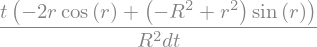

In [34]:
drEq_MMS=sb.diff(Eq_MMS,r).simplify()
drEq_MMS

Calcul L(û) pour obtenir le terme source :

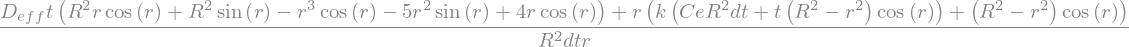

In [35]:
MMS=Eq_MMS.diff(t)-D_eff*(Eq_MMS.diff(r,2)+(1/r)*Eq_MMS.diff(r))+k*Eq_MMS

MMS.simplify()

In [45]:
f_MMS=sb.lambdify([r,t,Ce,R,dt],Eq_MMS,"numpy")
f_drMMS=sb.lambdify([r,t,R],drEq_MMS,"numpy")

Vérification condition de Dirichlet en r=R

In [47]:
f_MMS(0.5,1e6,10,0.5,1e6) 

Vérification condition de Neumann en r=0

In [38]:
f_drMMS(0,1e6,0.5)

Tracé de la solution MMS pour $dt = 1e6 s$

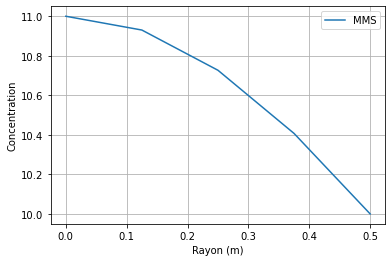

In [55]:
Vr = np.linspace(0,0.5,5)
plt.plot(Vr,f_MMS(Vr,1e6,10,0.5,1e6),label="MMS")
plt.xlabel("Rayon (m)")
plt.ylabel("Concentration")
plt.grid()
plt.legend()